In [1]:
from NN_Tree_Comparison import *

%load_ext autoreload
%autoreload 2
from virtual_screening.function import *
from virtual_screening.evaluation import *
from virtual_screening.models.deep_classification import *

/home/sliu426/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


# Plot Distribution

In [2]:
lightchem = np.load('../../../fold_0.npz')

In [3]:
lightchem.keys()

['y_pred_on_val',
 'labels',
 'y_val',
 'y_train',
 'y_pred_on_test',
 'y_pred_on_train',
 'y_test']

In [4]:
y_test_pred_on_lightchem = lightchem['y_pred_on_test']
y_test_on_lightchem = lightchem['y_test']

In [5]:
cts_label = y_test_pred_on_lightchem[:, 0]
min_cts = int(min(cts_label))
max_cts = int(max(cts_label)) + 1

step = 0.01
x_axis = np.arange(min_cts, max_cts+step, step) * 100
mapper = dict()
for cts in x_axis:
    mapper[cts] = 0
for cts in cts_label:
    value = cts/step
    index = int(value)
    key = x_axis[index]
    mapper[key] += 1

(0, 100)

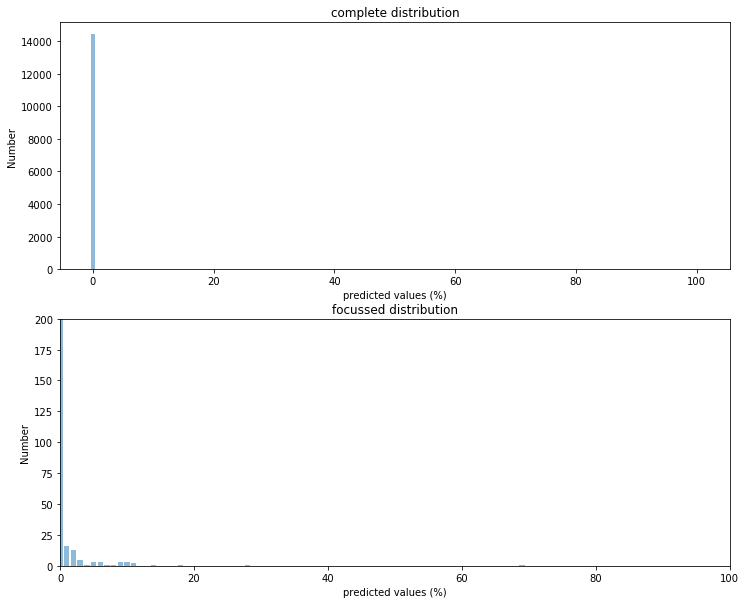

In [6]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)

x_axis = mapper.keys()
y_axis = mapper.values()


figure, axarr = plt.subplots(2, 1)
axarr[0].bar(x_axis, y_axis, align='center', alpha=0.5)
axarr[0].set_xlabel('predicted values (%)')
axarr[0].set_ylabel('Number')
axarr[0].set_title('complete distribution')
plt.xlim(0, 100)

axarr[1].bar(x_axis, y_axis, align='center', alpha=0.5)
axarr[1].set_xlabel('predicted values (%)')
axarr[1].set_ylabel('Number')
axarr[1].set_title('focussed distribution')
plt.ylim(0, 200)
plt.xlim(0, 100)